In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print(df.columns.tolist())


['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [5]:
df.drop(['id', 'date', 'zipcode'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


<AxesSubplot:title={'center':'Correlation with price'}>

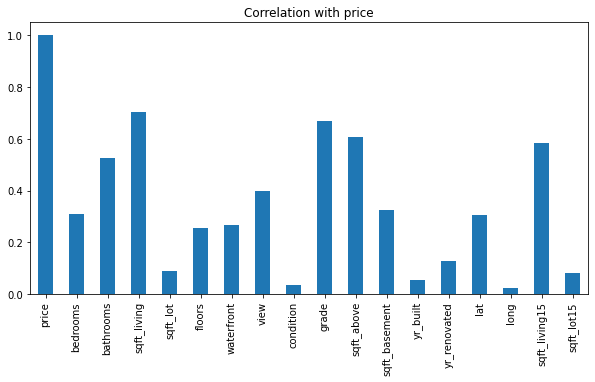

In [6]:
df.corrwith(df['price']).plot.bar(figsize=(10,5), title='Correlation with price')


In [7]:
from sklearn.decomposition import PCA


In [8]:
X = df.drop(['price'], axis=1)
y  = df['price']  

In [9]:
pca = PCA(n_components=3)


In [10]:
x = pca.fit_transform(X)


In [11]:
px.scatter_3d(x[:,0], x[:,1], x[:,2],y)


In [12]:
import xgboost as xgb


C:\Users\DELL\miniconda3\envs\digi12\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [13]:
data_matrix = xgb.DMatrix(X,y)


C:\Users\DELL\miniconda3\envs\digi12\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [14]:
params = {
    'learning_rate' : .01,
    'max_depth' : 5,
    'alpha' : 10,
}

results = xgb.cv(
    params,
    data_matrix,
    num_boost_round=50,
    early_stopping_rounds=5,
    metrics=['rmse','mae'],
)
results

,train-rmse-mean,train-rmse-std,train-mae-mean,train-mae-std,test-rmse-mean,test-rmse-std,test-mae-mean,test-mae-std
0,647088.750000,2758.506693,534706.666667,195.475444,647166.500000,5540.897989,534724.187500,402.403738
1,641198.333333,2749.623460,529379.000000,194.346588,641356.937500,5587.123960,529408.583333,411.219288
2,635365.354167,2749.833132,524104.958333,192.080865,635614.458333,5596.531815,524148.135417,412.908937
3,629582.562500,2739.767952,518883.802083,190.299860,629938.062500,5609.043837,518943.375000,417.959022
4,623878.041667,2731.462025,513713.614583,188.425328,624329.145833,5638.421671,513793.270833,427.479619
5,618226.770833,2715.521223,508595.812500,186.484013,618783.291667,5667.622963,508692.520833,434.810831
6,612631.937500,2711.549157,503528.770833,185.987093,613280.729167,5684.021213,503641.843750,439.651578
7,607099.750000,2696.387689,498512.354167,183.882298,607851.229167,5710.599917,498641.302083,447.555479
8,601628.187500,2686.450465,493544.687500,182.173109,602448.687500,5734.127348,493682.093750,446.040778
9,596208.645833,2681.635052,488627.385417,181.071001,597128.979167,5745.415009,488777.635417,447.924178


In [17]:
grid_params = [
    (max_depth, learning_rate, alpha)
    for max_depth in range(5,20,5)
    for learning_rate in [.01,.1,.5]
    for alpha in range(0,50,5)
]

min_rmse = float('inf')
best_params = None

for max_depth,learning_rate,alpha in grid_params:
    params = {
        'max_depth' : max_depth,
        'learning_rate' : learning_rate,
        'alpha' : alpha,
    }
    results = xgb.cv(
        params,
        data_matrix,
        num_boost_round=500,
        early_stopping_rounds=5,
        metrics='rmse',
    )
    current_rmse = results['test-rmse-mean'].min()
    if current_rmse < min_rmse:
        min_rmse = current_rmse
        best_params = (max_depth,learning_rate,alpha)
        print(f'Current best params: {best_params}')

Current best params: (5, 0.01, 0)
Current best params: (5, 0.01, 20)
Current best params: (5, 0.1, 0)
Current best params: (5, 0.1, 5)
Current best params: (5, 0.1, 10)
Current best params: (5, 0.1, 15)
Current best params: (5, 0.1, 20)
Current best params: (5, 0.1, 25)
Current best params: (5, 0.1, 40)
Current best params: (5, 0.1, 45)


In [ ]:
best_params